In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.ensemble import (AdaBoostClassifier,
                               AdaBoostRegressor,
                               GradientBoostingClassifier,
                               GradientBoostingRegressor)

# Task 1 #

Будем работать с датасетом для предсказания оттока клиента.

Можно скачать датасет с google drive.

Целевой признак Churn


    Считайте данные через pandas

    Сделайте разбиение на обучение и тест с соотношением 80/20, со стратификацией по целевому признаку и random_state=1.

    Удалите признак идентификатора клиента. Изучите признаки в тренировочном датасете, убедитесь, что типы данных соответствуют значениям в признаке.

    Если есть не явные пропуски замените их в численных признаках на 0

Укажите в ответе, сколько категориальных/бинарных/численных признаков имеется в задаче.

In [22]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',', low_memory=False)
data = df.copy()
data = data.drop(['customerID'], axis =1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Answer 1:

категориальных
10

бинарных 
6
 
численных 
3


# Task 2 #

Продолжайте работать с датасетом для предсказания оттока клиента.

Преобразуйте бинарные признаки через OrdinalEncoder, а категориальные - через OneHotEncoder (с параметром sparse_output=False).

Не забудьте удалить преобразованные категориальные колонки из выборок.

Какая получилась размерность у тренировочной и тестовой выборок?

In [25]:
X = data.drop(['Churn'], axis=1)
y = data.Churn
X.shape

(7043, 19)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [27]:
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [28]:
X_train[numeric_cols] = X_train[numeric_cols].fillna(0)
X_test[numeric_cols] = X_test[numeric_cols].fillna(0)

In [29]:
OE = OrdinalEncoder()
X_train_bin = OE.fit_transform(X_train[binary_cols])
X_test_bin = OE.transform(X_test[binary_cols])

In [30]:
onehot= OneHotEncoder(sparse_output=False)
X_train_cat = onehot.fit_transform(X_train[categorical_cols])
X_test_cat = onehot.transform(X_test[categorical_cols])

In [31]:
X_train_num = X_train[numeric_cols].to_numpy()
X_test_num = X_test[numeric_cols].to_numpy()

In [32]:
X_train_final = np.hstack([X_train_bin, X_train_cat, X_train_num])
X_test_final = np.hstack([X_test_bin, X_test_cat, X_test_num])

Answer 2:

In [33]:
X_train_final.shape

(5634, 40)

In [34]:
X_test_final.shape

(1409, 40)

# Task 3 #
Для выполнения задания вы можете самостоятельно создать Python-ноутбук, а в LMS прикладывать лишь требуемые результаты.

Продолжайте работать с датасетом для предсказания оттока клиента.

    Обучите случайный лес на базовых гиперпараметрах с фиксированным random_state=1 и посчитайте метрику f1 с усреднением macro на тренировочной и тестовой выборках.

    Обучите градиентный бустинг из sklearn на базовых гиперпараметрах с фиксированным random_state=1 и посчитайте метрику f1 с усреднением macro на тренировочной и тестовой выборках.

Укажите, на сколько метрика на тесте на градиентном бустинге лучше, чем на случайном лесу, округлив до второго знака после точки.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

RF_clf = RandomForestClassifier(random_state=1)
RF_clf.fit(X_train_final, y_train)

print(f"{f1_score(y_train, RF_clf.predict(X_train_final), average='macro')} \ {f1_score(y_test, RF_clf.predict(X_test_final), average='macro')}")

0.9972661602167274 \ 0.6953042940994748


In [36]:
GB_clf = GradientBoostingClassifier(random_state=1)
GB_clf.fit(X_train_final, y_train)
print(f"{f1_score(y_train, GB_clf.predict(X_train_final), average='macro')} \ {f1_score(y_test, GB_clf.predict(X_test_final), average='macro')}")

0.7591926876370532 \ 0.7316248951876642


Answer 3

In [37]:
print(f"{(f1_score(y_test, GB_clf.predict(X_test_final), average='macro') - f1_score(y_test, RF_clf.predict(X_test_final), average='macro'))}")

0.03632060108818935


# Task 4 #

Для выполнения задания вы можете самостоятельно создать Python-ноутбук, а в LMS прикладывать лишь требуемые результаты.

Продолжайте работать с датасетом для предсказания оттока клиента.

У модели градиентный бустинг оставьте параметр random_state=1. Измените глубину деревьев от 1 до 20 с шагом 1.

Визуализируйте изменение метрики f1 macro на тренировочной и тестовой выборках от параметра глубины.

Выберите правильный вывод.

Выберите один ответ:

    Параметр max_depth не влияет на качество градиентного бустинга на тесте

    Увеличение до разумных пределов параметра max_depth в градиентном бустинге улучшает качество модели на тесте

    Увеличение до разумных пределов параметра max_depth в градиентном бустинге ухудшает качество модели на тесте 

In [38]:
tree_depth = np.arange(1, 21)

depth = 1
depth = 2
depth = 3
depth = 4
depth = 5
depth = 6
depth = 7
depth = 8
depth = 9
depth = 10
depth = 11
depth = 12
depth = 13
depth = 14
depth = 15
depth = 16
depth = 17
depth = 18
depth = 19
depth = 20


Text(0, 0.5, 'f1')

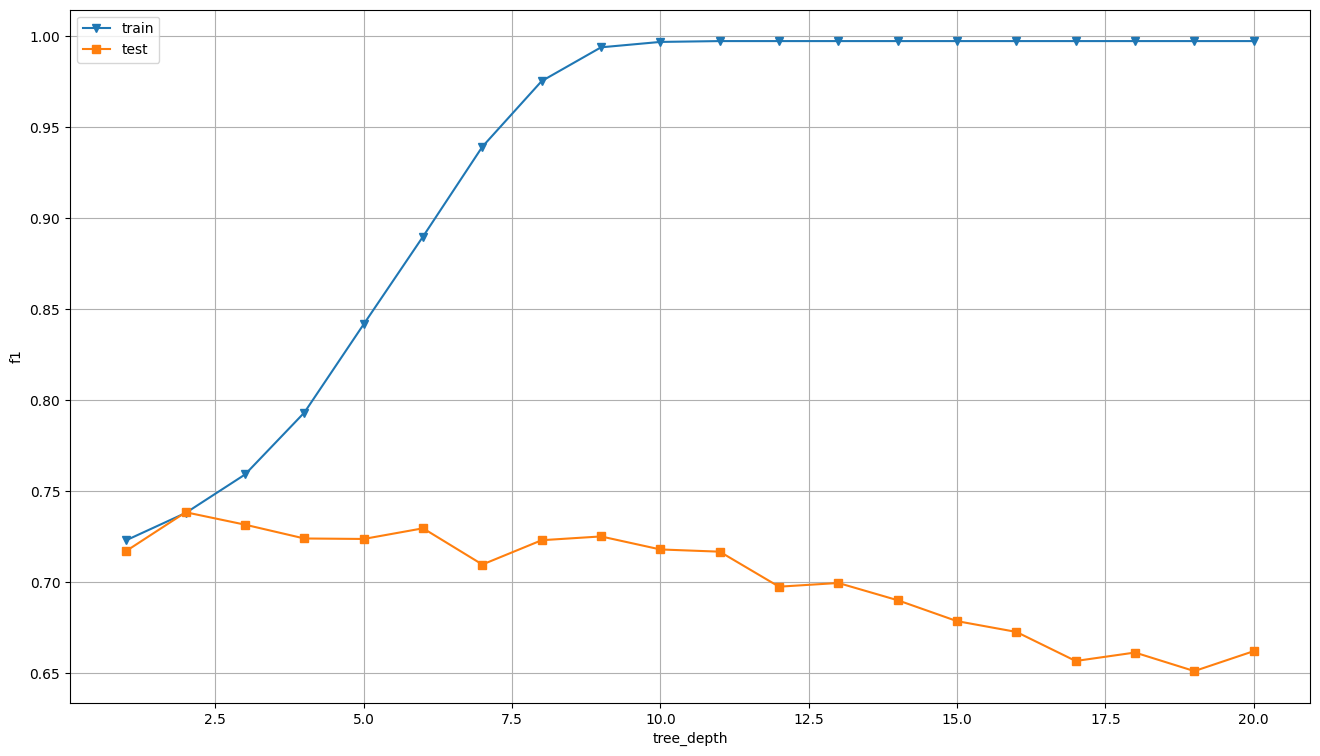

In [39]:
train4 = []
test4 = []
for depth in tree_depth:
    print(f'depth = {depth}')
    clf4 = GradientBoostingClassifier(random_state=1, max_depth=depth)
    clf4.fit(X_train_final, y_train)
    y_pred4_train = clf4.predict(X_train_final)
    y_pred4_test = clf4.predict(X_test_final)
    train4.append(f1_score(y_train, y_pred4_train, average='macro'))
    test4.append(f1_score(y_test, y_pred4_test, average='macro'))

plt.figure(figsize=(16,9))
plt.plot(tree_depth, train4, marker='v', label = 'train')
plt.plot(tree_depth, test4, marker = 's', label = 'test')
plt.grid(True)
plt.legend()
plt.xlabel('tree_depth')
plt.ylabel('f1')

Answer 4:

    Увеличение до разумных пределов параметра max_depth в градиентном бустинге ухудшает качество модели на тесте

# Task 5 #
Продолжайте работать с датасетом для предсказания оттока клиента.

У модели градиентный бустинг оставьте параметр random_state=1. Измените скорость обучения от 0.1 до 0.9 с шагом 0.1.

Визуализируйте изменение метрики f1 macro на тренировочной и тестовой выборках от параметра скорости обучения.

Выберите правильный вывод.
Выберите один ответ:

    Увеличение до разумных пределов параметра learning_rate в градиентном бустинге ухудшает качество модели на тесте 

    Увеличение до разумных пределов параметра learning_rate в градиентном бустинге улучшает качество модели на тесте

    Параметр learning_rate не влияет на качество градиентного бустинга на тесте

In [40]:
l_rate = np.arange(0.1, 1, 0.1)
l_rate

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

depth = 0.1
depth = 0.2
depth = 0.30000000000000004
depth = 0.4
depth = 0.5
depth = 0.6
depth = 0.7000000000000001
depth = 0.8
depth = 0.9


Text(0, 0.5, 'f1')

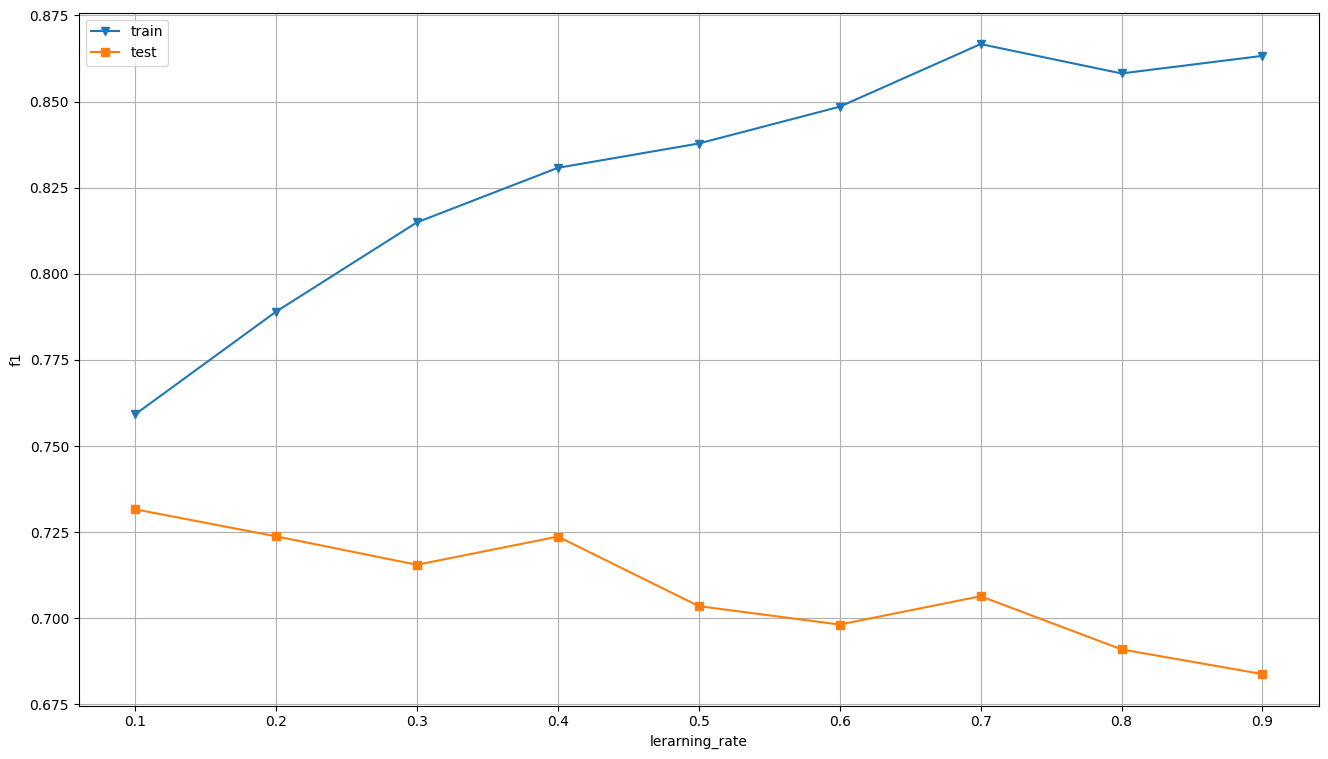

In [41]:
train5 = []
test5 = []
for lr in l_rate:
    print(f'depth = {lr}')
    clf5 = GradientBoostingClassifier(random_state=1, learning_rate= lr)
    clf5.fit(X_train_final, y_train)
    y_pred5_train = clf5.predict(X_train_final)
    y_pred5_test = clf5.predict(X_test_final)
    train5.append(f1_score(y_train, y_pred5_train, average='macro'))
    test5.append(f1_score(y_test, y_pred5_test, average='macro'))

plt.figure(figsize=(16,9))
plt.plot(l_rate, train5, marker='v', label = 'train')
plt.plot(l_rate, test5, marker = 's', label = 'test')
plt.grid(True)
plt.legend()
plt.xlabel('lerarning_rate')
plt.ylabel('f1')

Answer 5:

    Увеличение до разумных пределов параметра learning_rate в градиентном бустинге ухудшает качество модели на тесте 


# Task 6 #

Для выполнения задания вы можете самостоятельно создать Python-ноутбук, а в LMS прикладывать лишь требуемые результаты.

Продолжайте работать с датасетом для предсказания оттока клиента.

Обучите модель CatBoost с параметрами random_state=1, n_estimators=100 на данных без не явных пропусков, без идентификатора клиента и без предобработанных категориальных и бинарных переменных, передав в параметр cat_features модели список категориальных и бинарных признаков.

Укажите метрику F1 macro на тестовой выборке, округлив ее до третьего знака после точки.

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
from catboost import CatBoostClassifier

In [45]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0)

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] + ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
print(len(cat_features))
# Определение признаков и целевой переменной
X = data.drop(columns=['customerID', 'Churn'])  # Убираем идентификатор и целевой признак
y = data['Churn']


16


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Создание и обучение модели CatBoost
clf = CatBoostClassifier(random_state=1, n_estimators=100, cat_features=cat_features, verbose=100)
clf.fit(X_train, y_train)

Learning rate set to 0.178046
0:	learn: 0.6325535	total: 171ms	remaining: 17s
99:	learn: 0.3945603	total: 1.83s	remaining: 0us


In [47]:
y_test_pred = clf.predict(X_test)

# Вычисление метрики F1 macro
f1_macro = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 macro на тестовой выборке: {f1_macro:.3f}')

F1 macro на тестовой выборке: 0.749
